In [34]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings .filterwarnings('ignore')


In [180]:
test=pd.read_csv(r"C:\Users\asus\Desktop\my desk\kaggle comp\house-prices-advanced-regression-techniques\test.csv")
train=pd.read_csv(r"C:\Users\asus\Desktop\my desk\kaggle comp\house-prices-advanced-regression-techniques\train.csv")

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
train.shape

(1460, 81)

In [38]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [39]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [40]:
for i in train.columns:
    null_rate = train[i].isna().sum() / len(train) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

LotFrontage null rate: 17.74%
Alley null rate: 93.77%
MasVnrType null rate: 0.55%
MasVnrArea null rate: 0.55%
BsmtQual null rate: 2.53%
BsmtCond null rate: 2.53%
BsmtExposure null rate: 2.6%
BsmtFinType1 null rate: 2.53%
BsmtFinType2 null rate: 2.6%
Electrical null rate: 0.07%
FireplaceQu null rate: 47.26%
GarageType null rate: 5.55%
GarageYrBlt null rate: 5.55%
GarageFinish null rate: 5.55%
GarageQual null rate: 5.55%
GarageCond null rate: 5.55%
PoolQC null rate: 99.52%
Fence null rate: 80.75%
MiscFeature null rate: 96.3%


In [41]:
train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [42]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train["LotFrontage"] = train["LotFrontage"].fillna(train["LotFrontage"].mean())
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0]) 
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])  

In [44]:
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train.drop(['Id'],axis=1,inplace=True)

<AxesSubplot:>

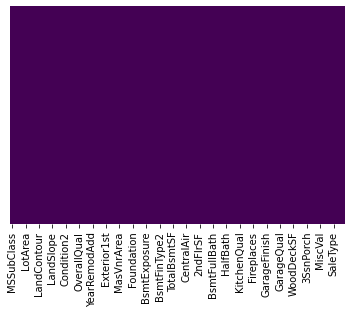

In [46]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
categorical=[x for x in train.columns if train[x].dtype=="O"]
print(categorical)
numerical=[x for x in train.columns if x not in categorical]
print(numerical)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal

In [50]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


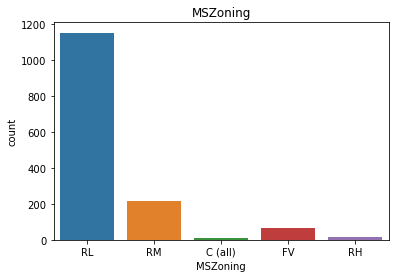

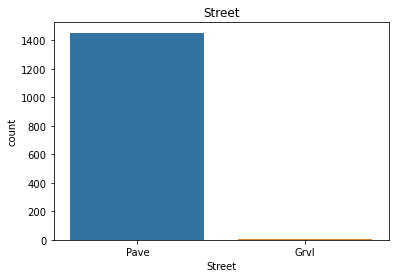

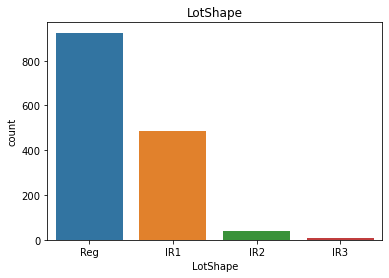

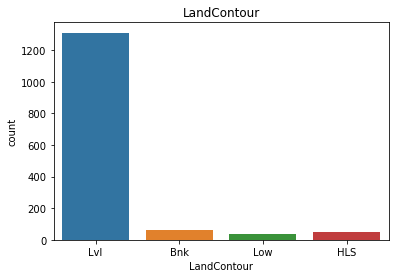

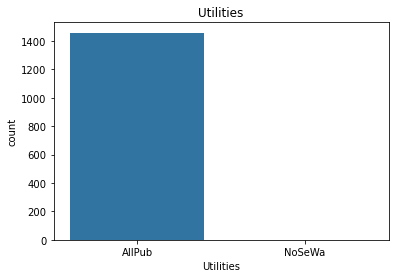

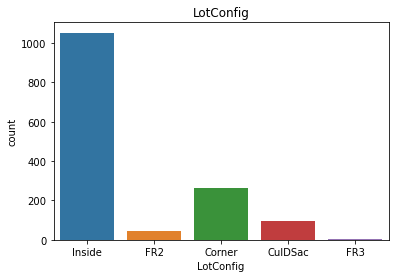

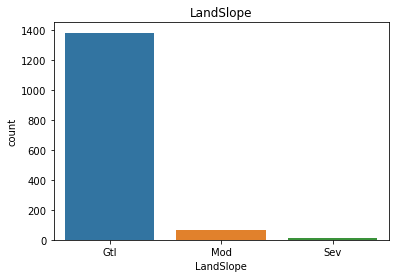

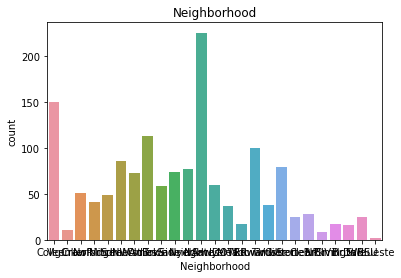

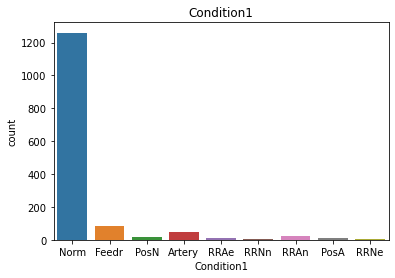

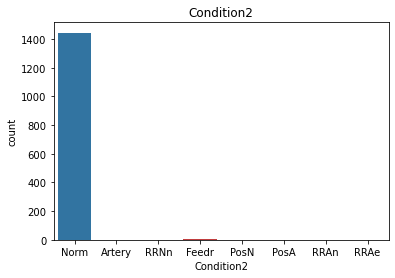

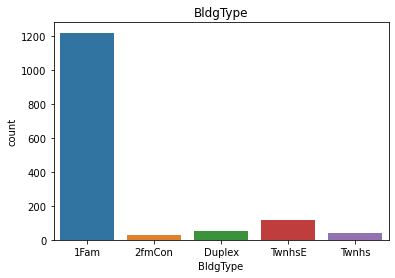

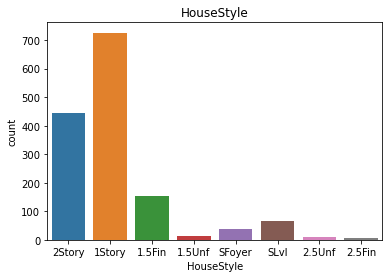

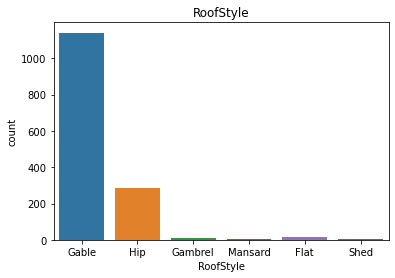

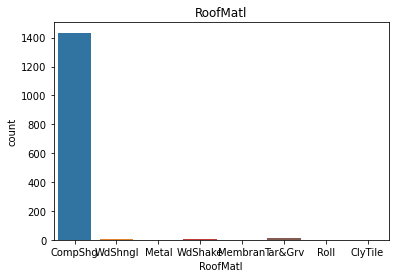

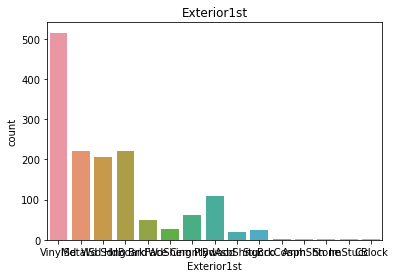

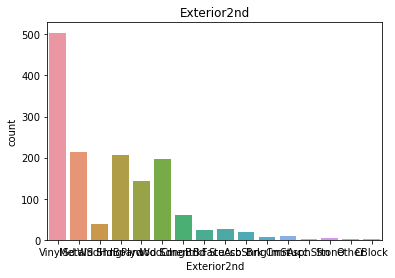

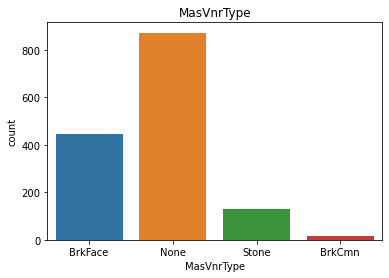

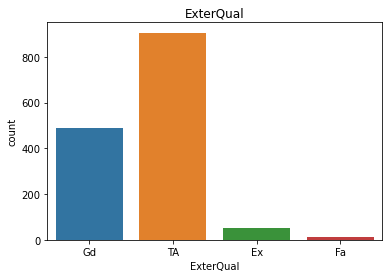

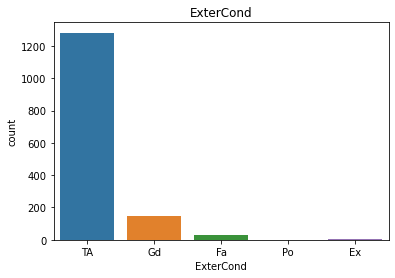

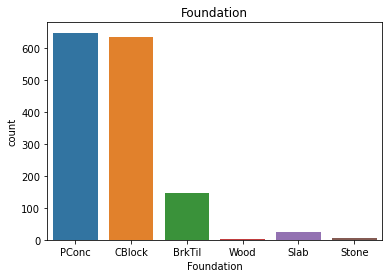

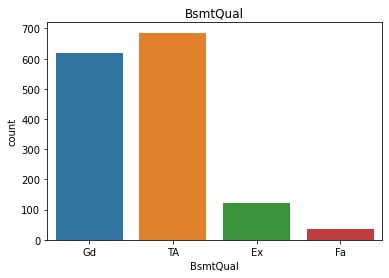

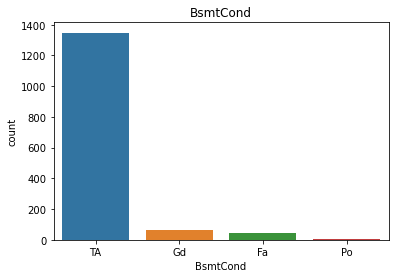

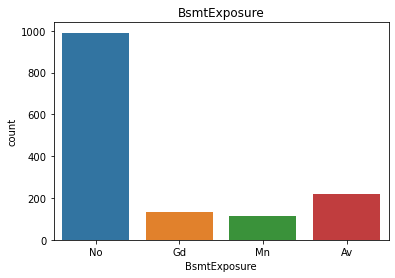

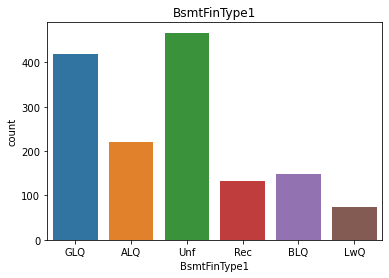

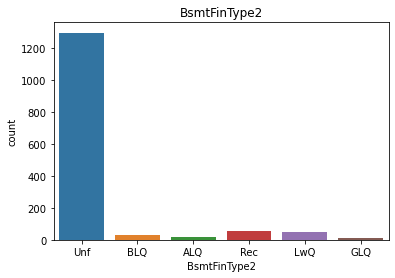

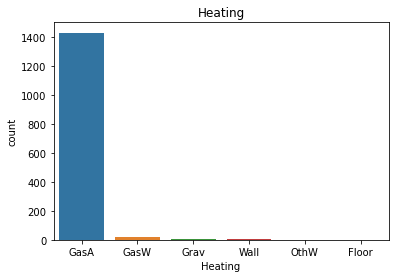

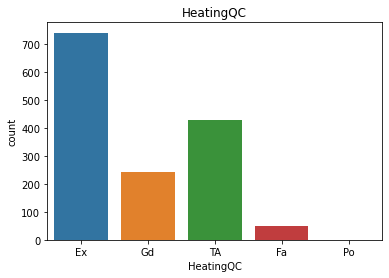

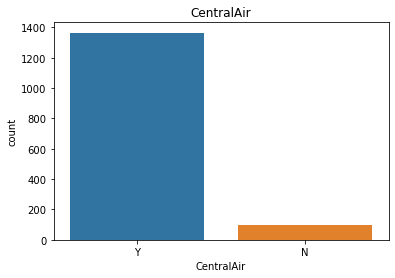

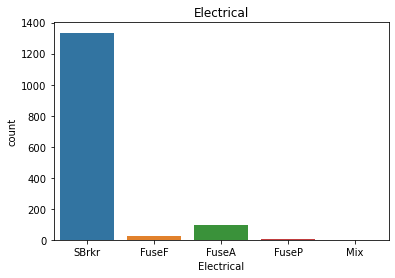

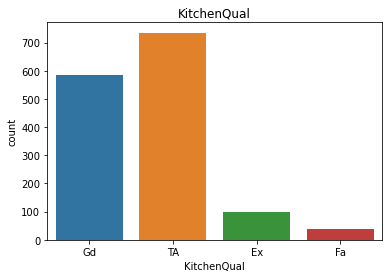

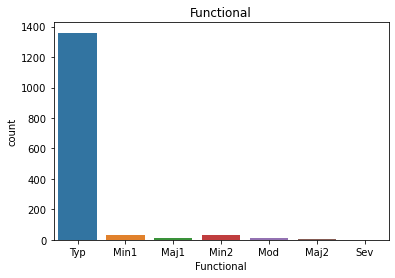

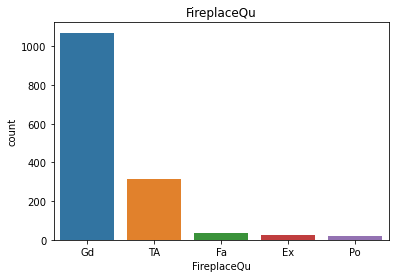

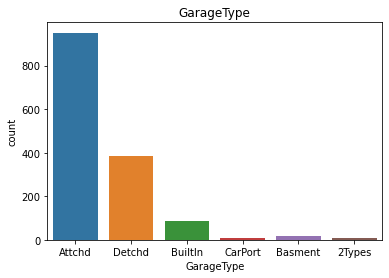

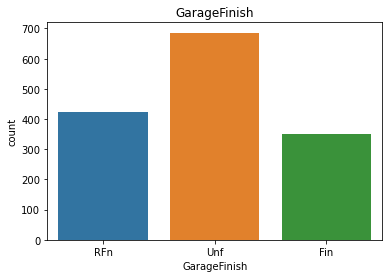

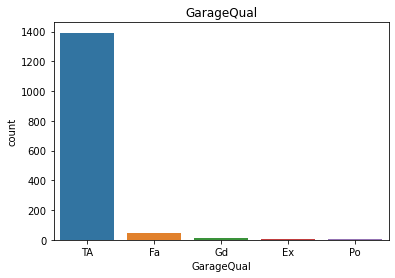

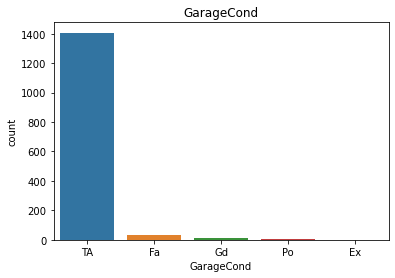

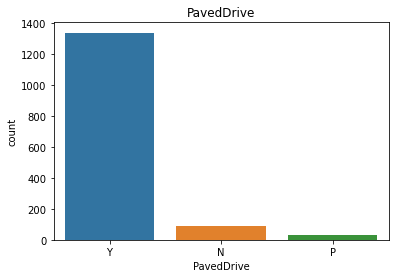

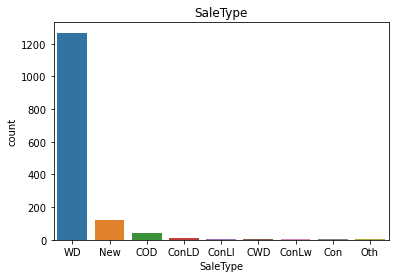

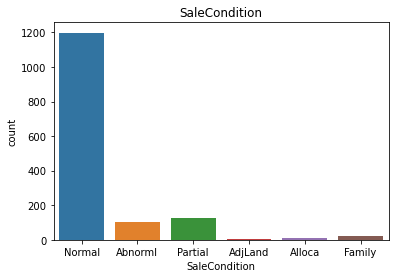

In [52]:
for i , r in enumerate(categorical):
    plt.figure()
    plt.title(r)
    sns.countplot(data = train , x = r)

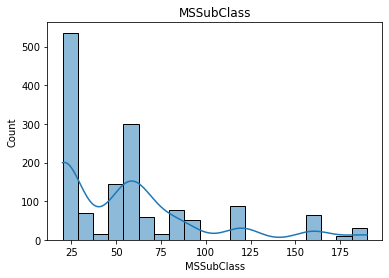

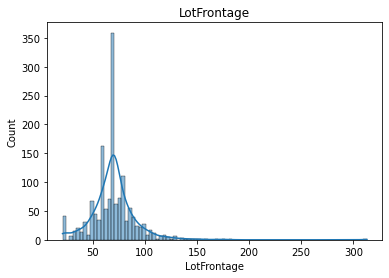

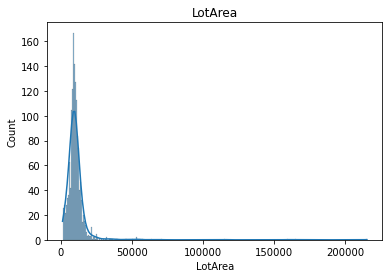

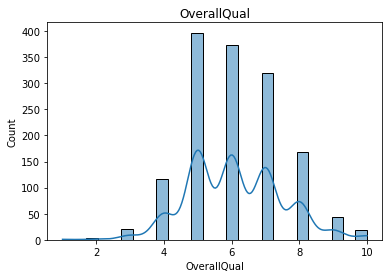

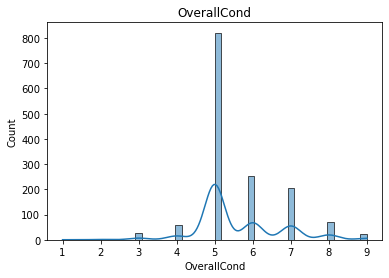

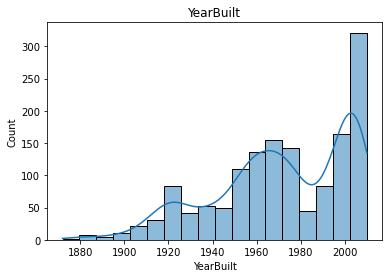

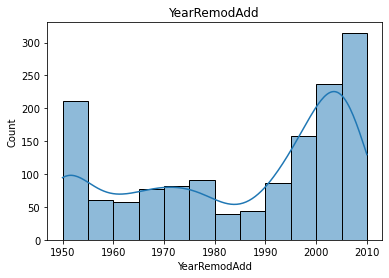

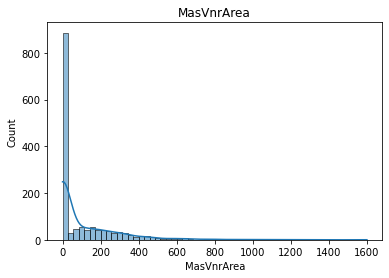

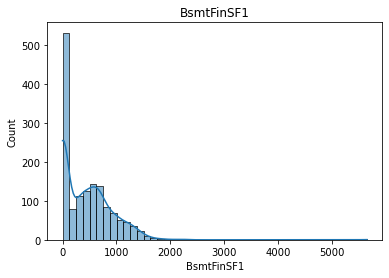

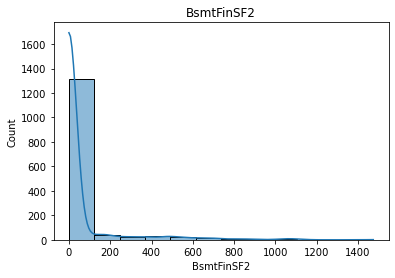

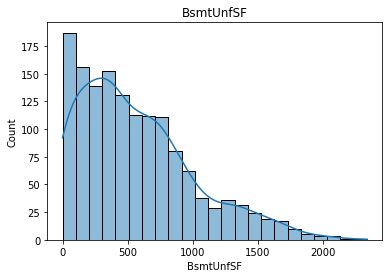

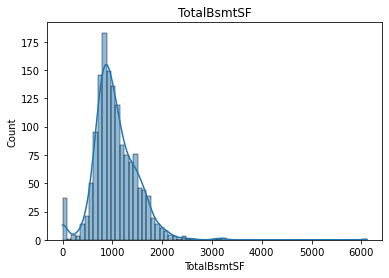

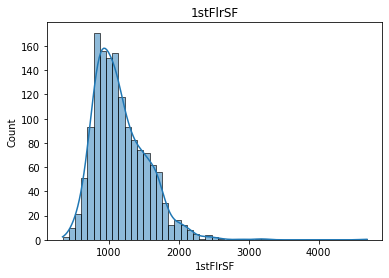

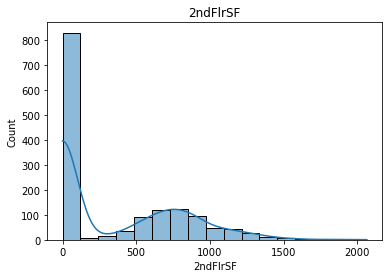

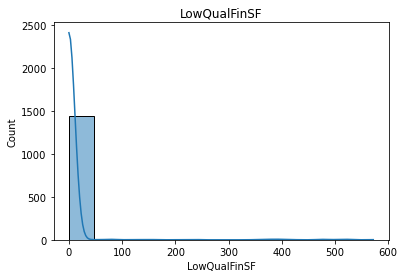

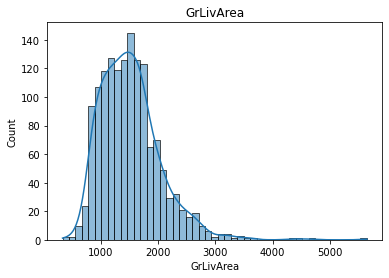

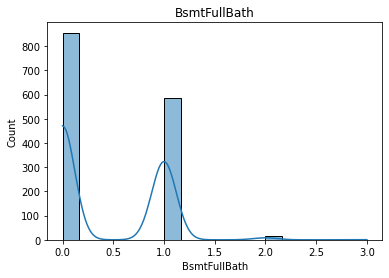

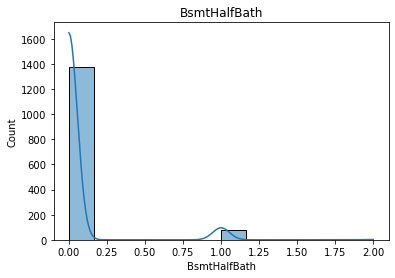

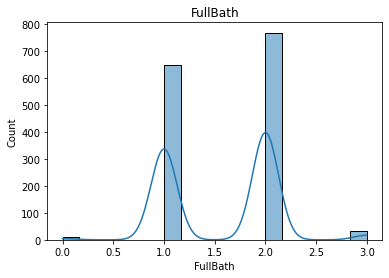

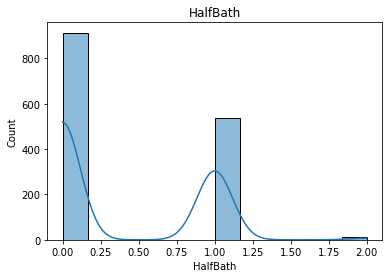

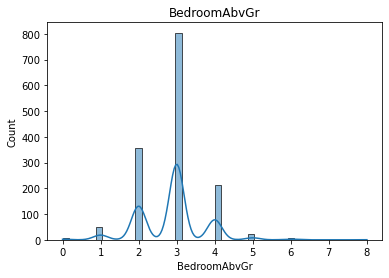

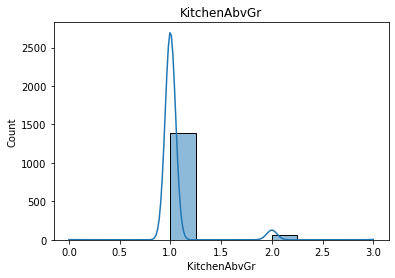

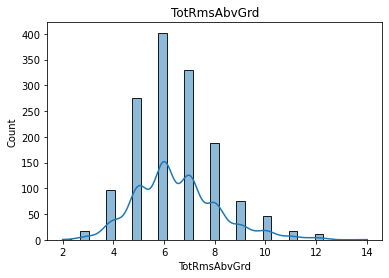

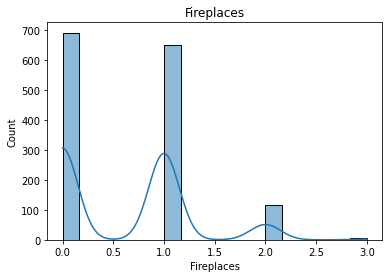

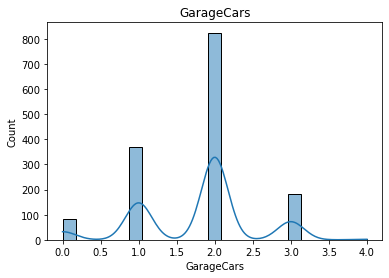

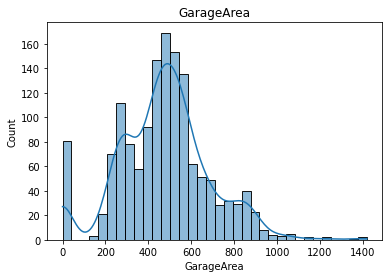

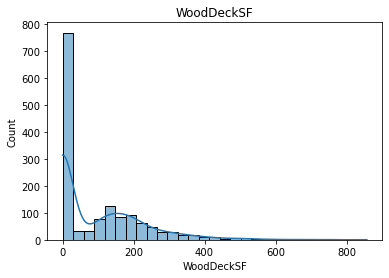

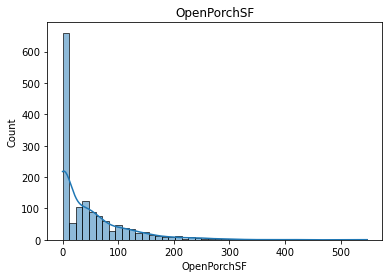

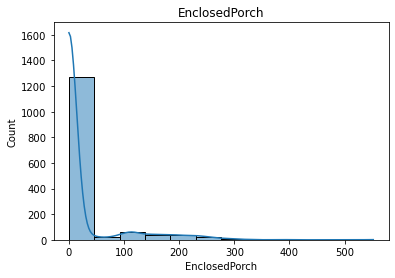

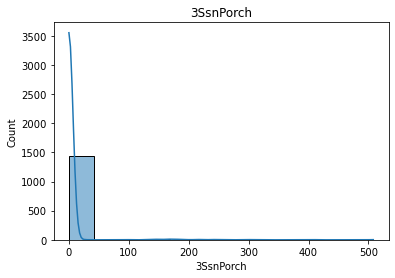

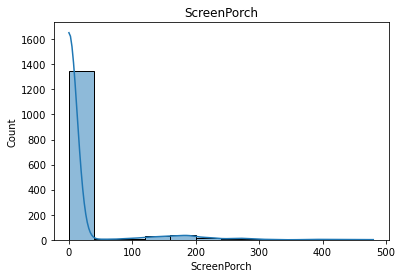

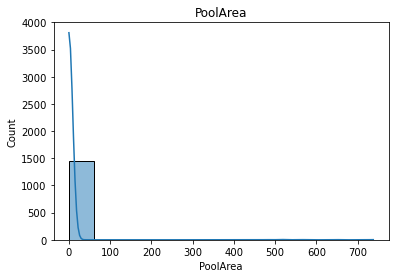

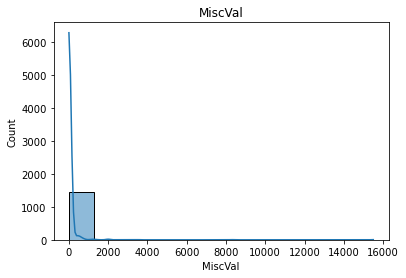

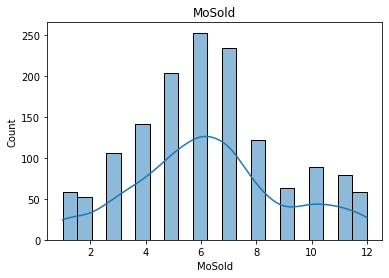

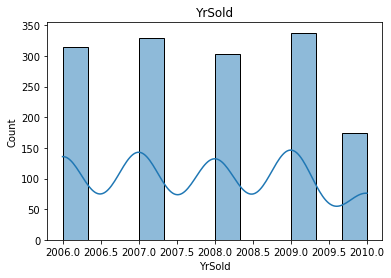

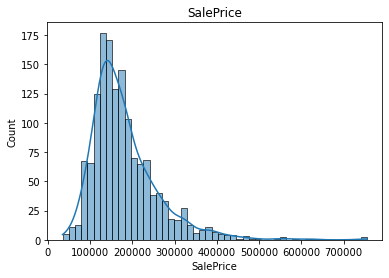

In [53]:
for i , r in enumerate(numerical):
    plt.figure()
    plt.title(r)
    sns.histplot(train[r] , kde = True)


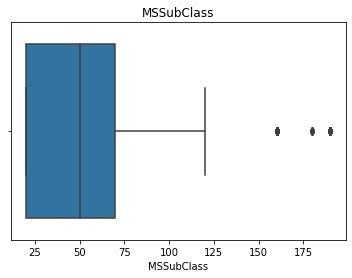

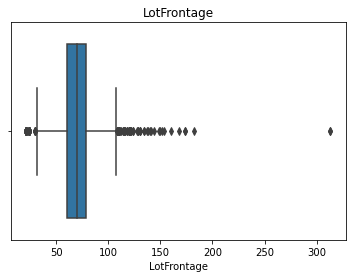

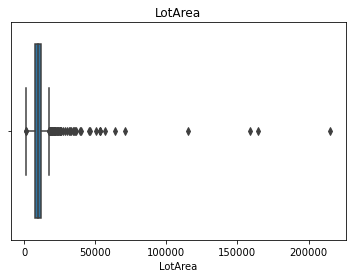

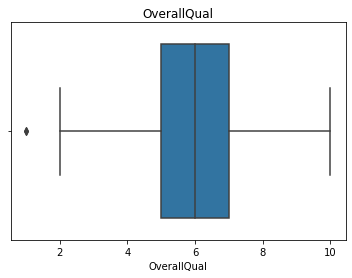

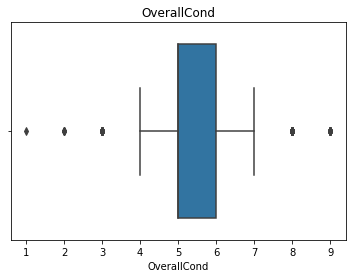

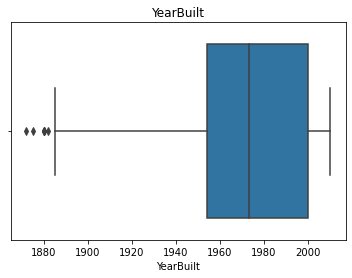

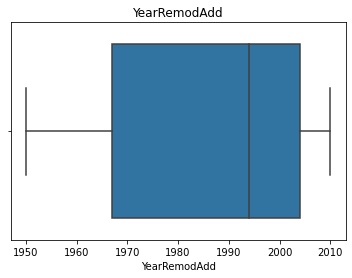

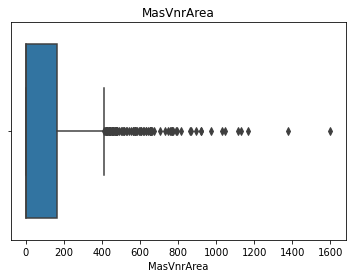

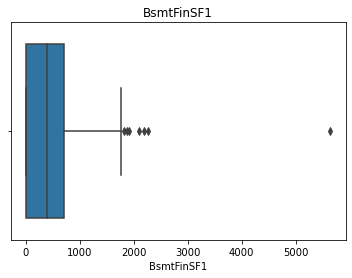

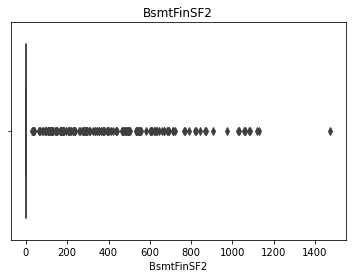

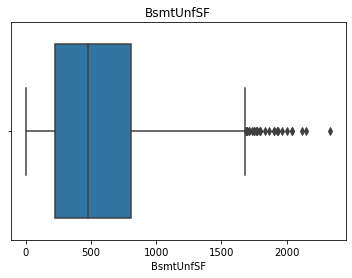

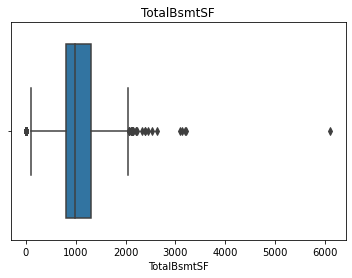

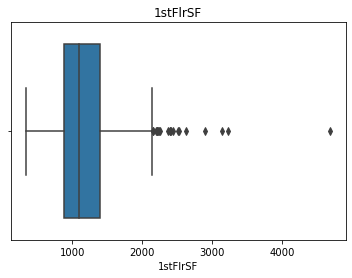

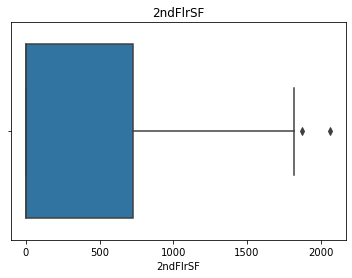

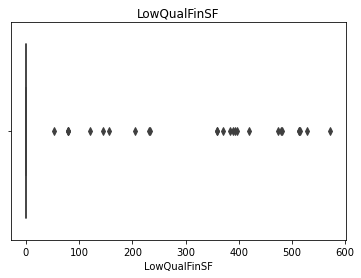

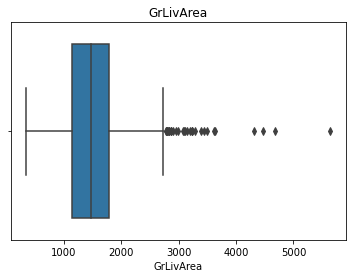

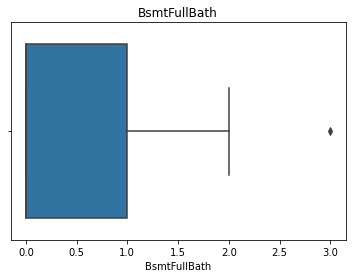

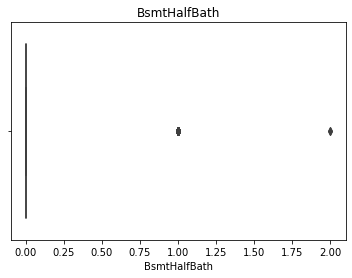

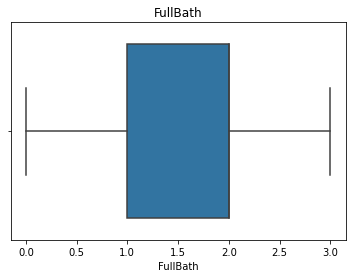

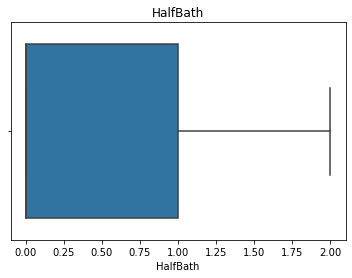

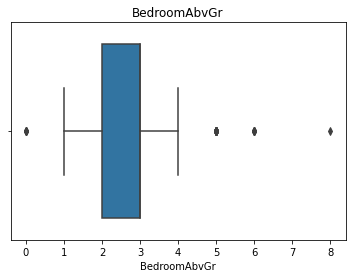

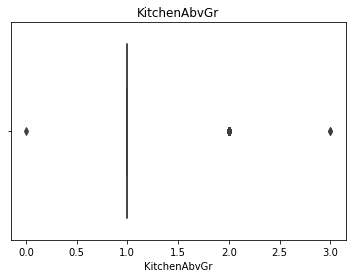

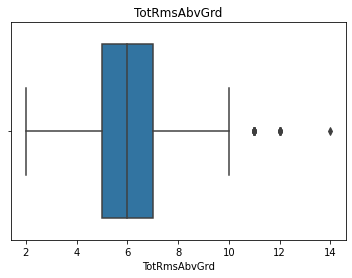

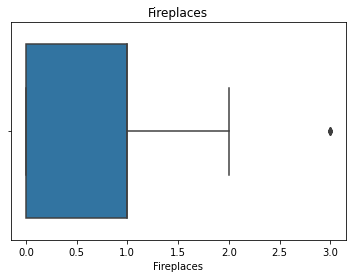

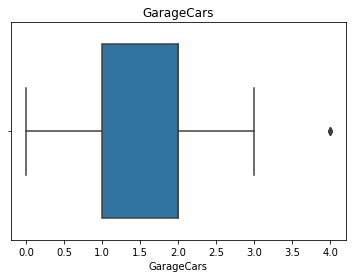

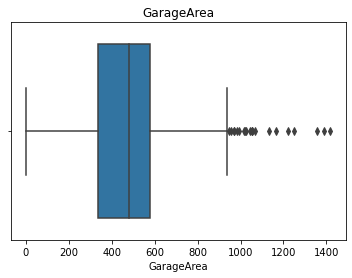

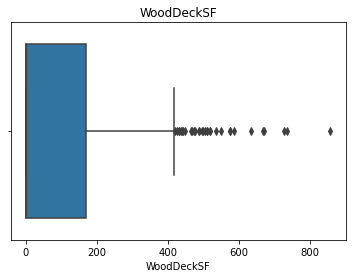

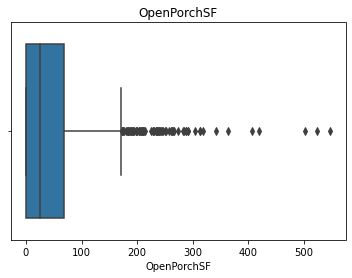

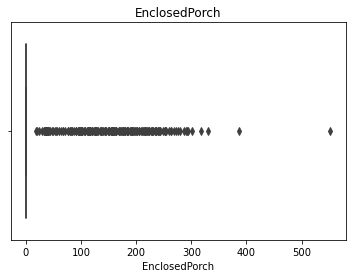

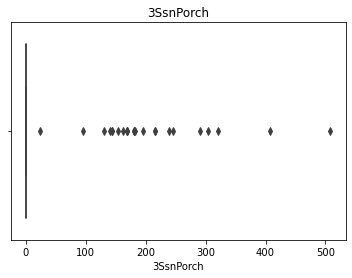

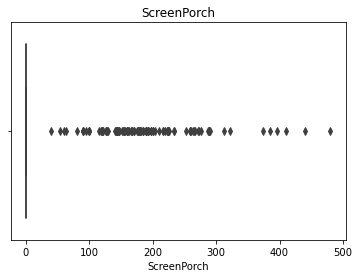

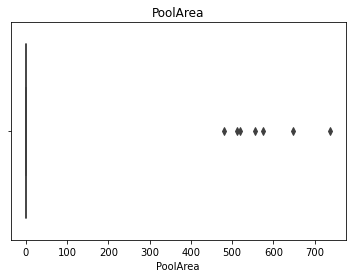

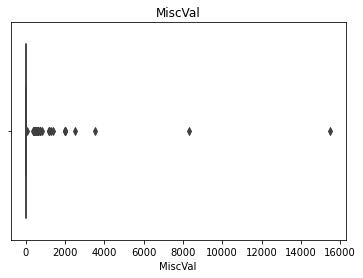

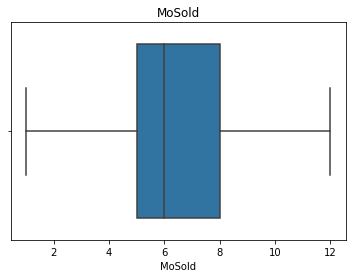

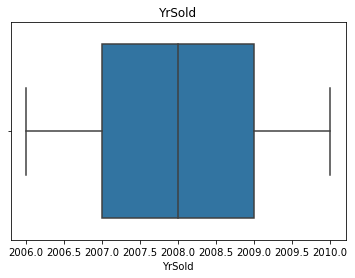

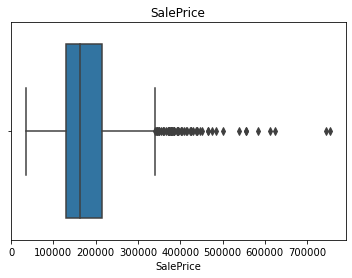

In [54]:
for i , r in enumerate(numerical):
        plt.figure()
        plt.title(r)
        sns.boxplot(x =train[r])

In [55]:
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [57]:
train[numerical]=train[numerical].apply(lambda x: outlier_tret(x))

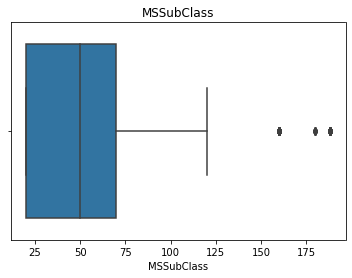

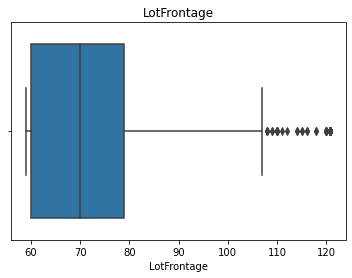

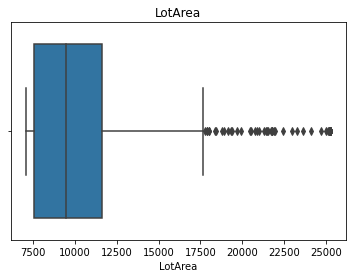

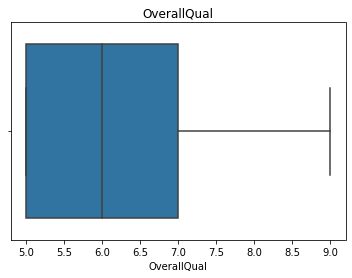

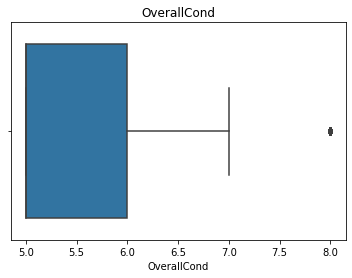

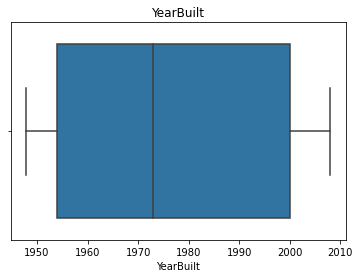

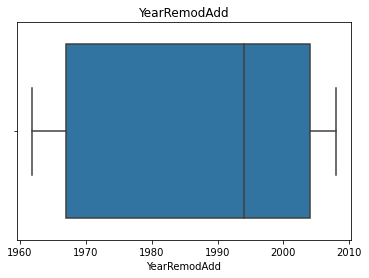

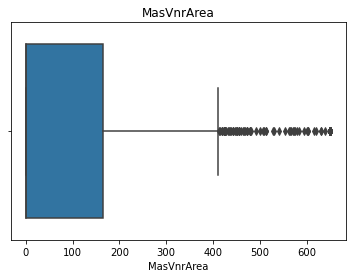

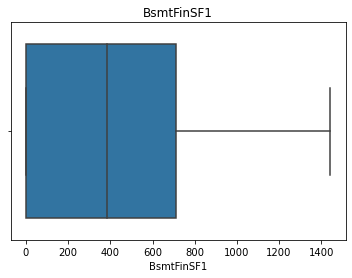

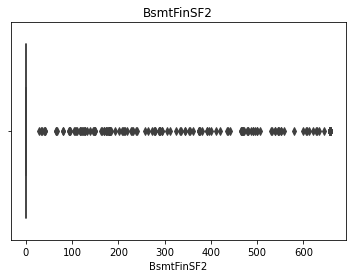

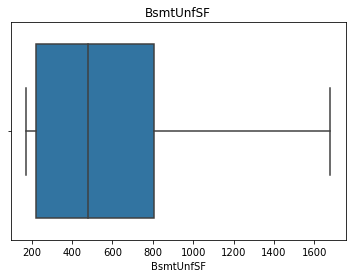

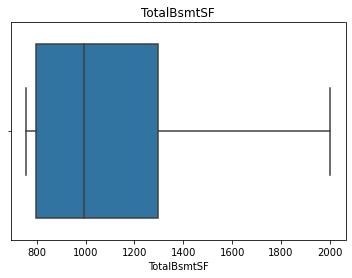

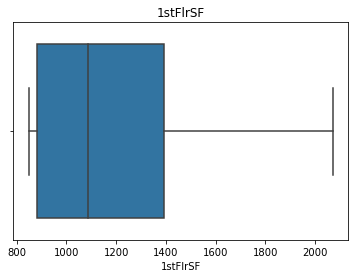

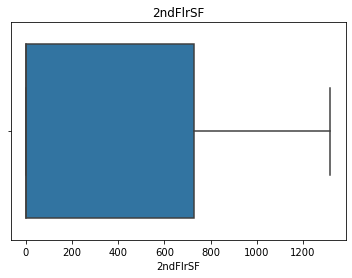

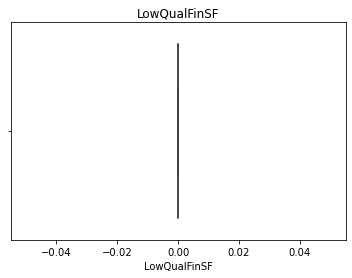

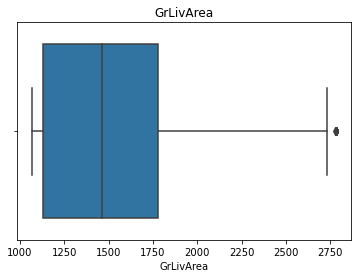

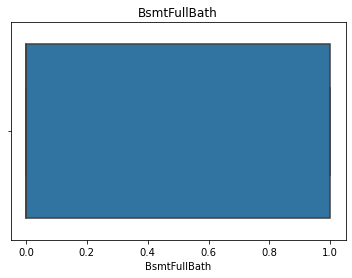

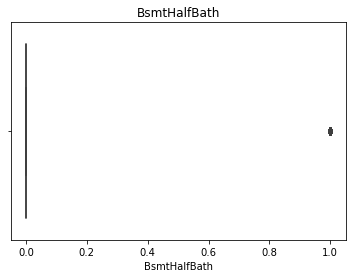

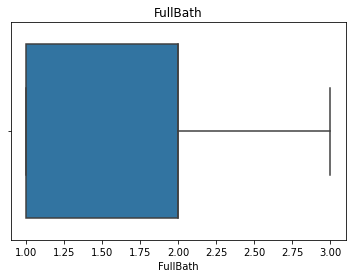

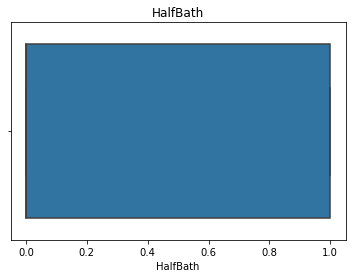

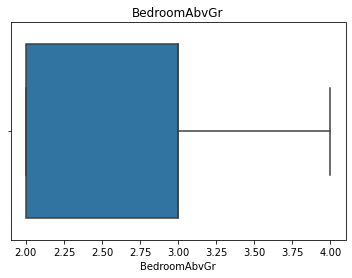

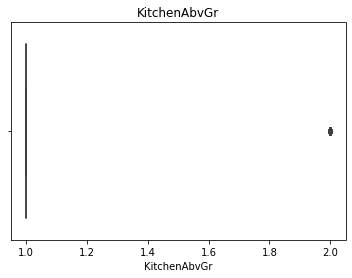

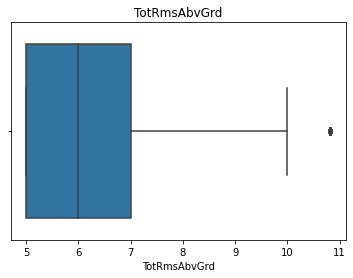

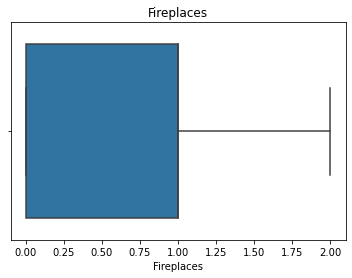

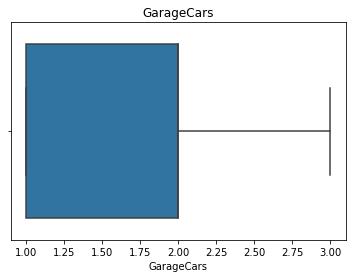

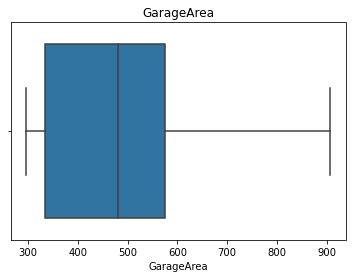

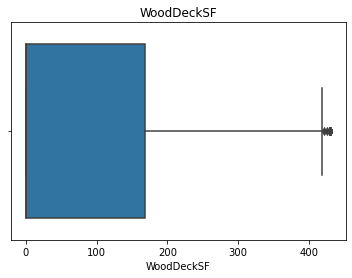

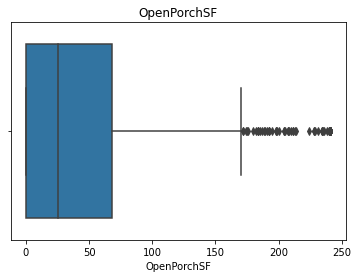

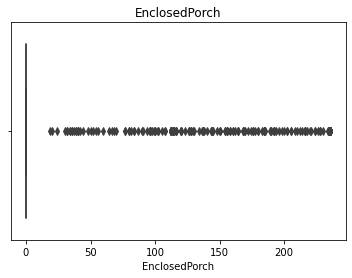

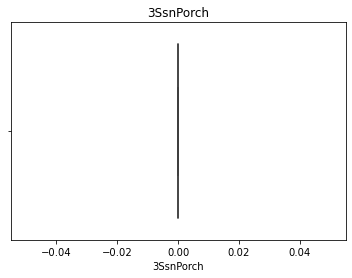

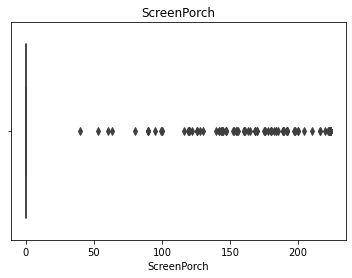

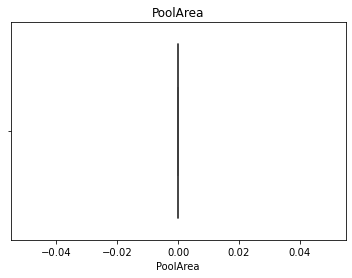

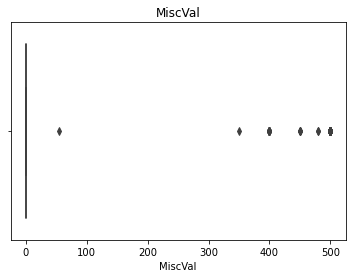

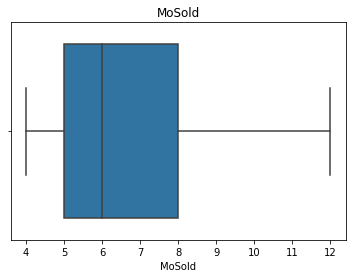

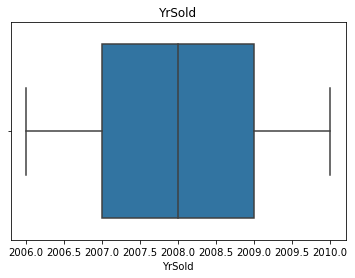

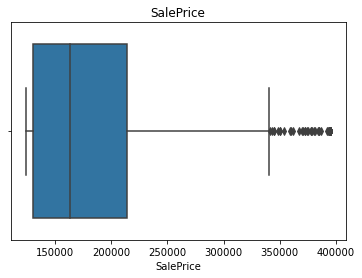

In [80]:
for i , r in enumerate(numerical):
        plt.figure()
        plt.title(r)
        sns.boxplot(x =train[r])

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [84]:
for i in test.columns:
    null_rate = test[i].isna().sum() / len(test) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

MSZoning null rate: 0.27%
LotFrontage null rate: 15.56%
Alley null rate: 92.67%
Utilities null rate: 0.14%
Exterior1st null rate: 0.07%
Exterior2nd null rate: 0.07%
MasVnrType null rate: 1.1%
MasVnrArea null rate: 1.03%
BsmtQual null rate: 3.02%
BsmtCond null rate: 3.08%
BsmtExposure null rate: 3.02%
BsmtFinType1 null rate: 2.88%
BsmtFinSF1 null rate: 0.07%
BsmtFinType2 null rate: 2.88%
BsmtFinSF2 null rate: 0.07%
BsmtUnfSF null rate: 0.07%
TotalBsmtSF null rate: 0.07%
BsmtFullBath null rate: 0.14%
BsmtHalfBath null rate: 0.14%
KitchenQual null rate: 0.07%
Functional null rate: 0.14%
FireplaceQu null rate: 50.03%
GarageType null rate: 5.21%
GarageYrBlt null rate: 5.35%
GarageFinish null rate: 5.35%
GarageCars null rate: 0.07%
GarageArea null rate: 0.07%
GarageQual null rate: 5.35%
GarageCond null rate: 5.35%
PoolQC null rate: 99.79%
Fence null rate: 80.12%
MiscFeature null rate: 96.5%
SaleType null rate: 0.07%


In [90]:
test.drop(['Alley','MiscFeature','PoolQC','Fence'],axis=1,inplace=True)

In [97]:
test.drop(['Id','GarageYrBlt'],axis=1,inplace=True)

In [98]:

#Replacing numeric Null vlaues for testing set
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [99]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())


In [100]:
for i in test.columns:
    null_rate = test[i].isna().sum() / len(test) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))


<AxesSubplot:>

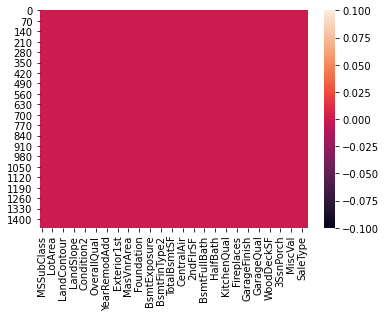

In [103]:
sns.heatmap(test.isna())

In [107]:
tt=pd.concat([train,test],axis=0)

In [108]:
tt

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.00,0.0,0.0,0.0,0.0,4.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.00,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,235.64,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.00,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,RM,21.0,1936.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.00,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,NaN
1455,160.0,RM,21.0,1894.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Abnorml,NaN
1456,20.0,RL,160.0,20000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.00,0.0,0.0,0.0,0.0,9.0,2006.0,WD,Abnorml,NaN
1457,85.0,RL,62.0,10441.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.00,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,NaN


In [114]:
cat=[x for x in tt.columns if tt[x].dtype=="O"]
print(cat)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
tt[cat_cols] = tt[cat_cols].apply(le.fit_transform)
tt

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,...,0.00,0.0,0.0,0.0,0.0,4.0,2008.0,8,4,208500.0
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,...,0.00,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,...,0.00,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,...,235.64,0.0,0.0,0.0,0.0,4.0,2006.0,8,0,140000.0
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,...,0.00,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160.0,4,21.0,1936.0,1,3,3,0,4,0,...,0.00,0.0,0.0,0.0,0.0,6.0,2006.0,8,4,NaN
1455,160.0,4,21.0,1894.0,1,3,3,0,4,0,...,0.00,0.0,0.0,0.0,0.0,4.0,2006.0,8,0,NaN
1456,20.0,3,160.0,20000.0,1,3,3,0,4,0,...,0.00,0.0,0.0,0.0,0.0,9.0,2006.0,8,0,NaN
1457,85.0,3,62.0,10441.0,1,3,3,0,4,0,...,0.00,0.0,0.0,0.0,700.0,7.0,2006.0,8,4,NaN


In [119]:
df_train = tt.iloc[:1460,:]
df_test = tt.iloc[1460:,:]

In [120]:
df_test.drop(["SalePrice"],axis=1,inplace=True)

In [128]:
x=df_train.drop(['SalePrice'],axis=1)
y=df_train['SalePrice']


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [149]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [145]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [154]:
from sklearn.linear_model import LinearRegression

In [156]:
regresser=LinearRegression()

In [159]:
regresser.fit(X_train,y_train)

LinearRegression()

In [160]:
y_pred=regresser.predict(X_test)

In [162]:
from sklearn.metrics import r2_score

In [165]:
score=r2_score(y_test,y_pred)

In [166]:
score

0.8837671696399109

In [170]:
prediction=regresser.predict(df_test)

In [176]:
df2=df_test.iloc[:,0]
df2

0        20.0
1        20.0
2        60.0
3        60.0
4       120.0
        ...  
1454    160.0
1455    160.0
1456     20.0
1457     85.0
1458     60.0
Name: MSSubClass, Length: 1459, dtype: float64

In [184]:
df3=pd.DataFrame(prediction)

In [183]:
df2=test['Id']
df2

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [187]:
prediction=pd.concat([df2,df3],axis=1)
prediction

,Id,0
0,1461,118293.898649
1,1462,186768.118903
2,1463,178773.057246
3,1464,190023.352150
4,1465,189789.694375
...,...,...
1454,2915,69692.718298
1455,2916,64918.010677
1456,2917,158158.373508
1457,2918,118156.673086


In [188]:
prediction.to_csv('prediction.csv')